In [1]:
# Orbit :

# IMPORTS :

import pandas as pd
import numpy as np
from datetime import timedelta
from orbit.models.dlt import DLTMAP, DLTAggregated, DLTFull
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.plot import plot_predicted_components
from orbit.utils.dataset import load_iclaims 

In [2]:
# DATABASE :

data = pd.read_csv('DATABASE.txt', sep=";", header=None, na_values=['?'])

data = data[:100]

data = data.rename(columns=data.iloc[0]).drop(data.index[0])

data["Time_index2"] = data["Date"] + " " + data["Time"]

data["timestamp"] = pd.to_datetime(data['Time_index2'], format='%d/%m/%Y %H:%M:%S')
data.set_index(['timestamp'],inplace=True)

data["Global_active_power"] = data["Global_active_power"].astype(float)

df = pd.DataFrame(data, columns=['Global_active_power'])

df = df.rename(columns={'Global_active_power': 'Y'})

df['date'] = df.index

# Split the dataset :
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:] 

date_col = 'date'
response_col = 'Y'

df

C:\Users\bapti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,Y,date
timestamp,,
2006-12-16 17:24:00,4.216,2006-12-16 17:24:00
2006-12-16 17:25:00,5.360,2006-12-16 17:25:00
2006-12-16 17:26:00,5.374,2006-12-16 17:26:00
2006-12-16 17:27:00,5.388,2006-12-16 17:27:00
2006-12-16 17:28:00,3.666,2006-12-16 17:28:00
...,...,...
2006-12-16 18:58:00,4.218,2006-12-16 18:58:00
2006-12-16 18:59:00,4.224,2006-12-16 18:59:00
2006-12-16 19:00:00,4.070,2006-12-16 19:00:00


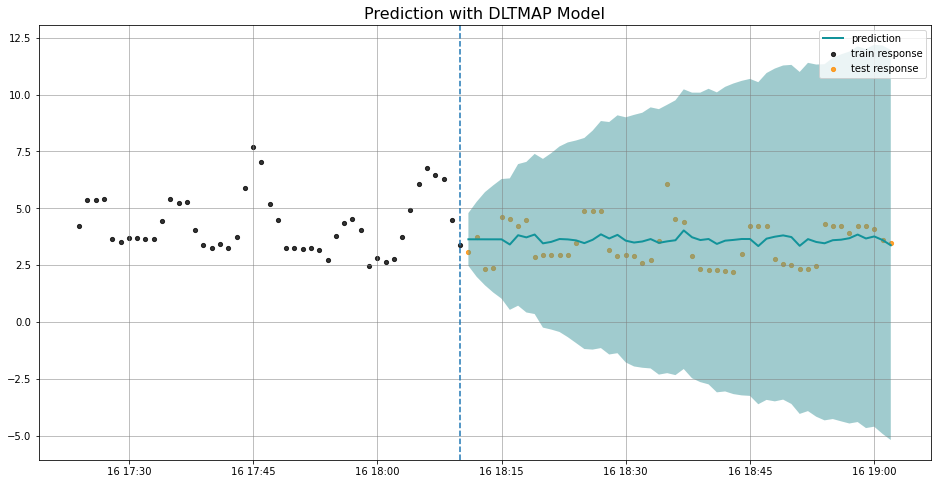

In [3]:
# DLTMAP :

#define the DLTMAP model
dlt = DLTMAP(
     response_col=response_col,
     date_col=date_col,
     seasonality=52,
     seed=8888,
 )

#train the model
dlt.fit(df=train_df)

#make inference
predicted_df = dlt.predict(df=test_df)

#Plot the results
_ = plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                     date_col=date_col, actual_col=response_col,  
                     test_actual_df=test_df, title='Prediction with DLTMAP Model') 

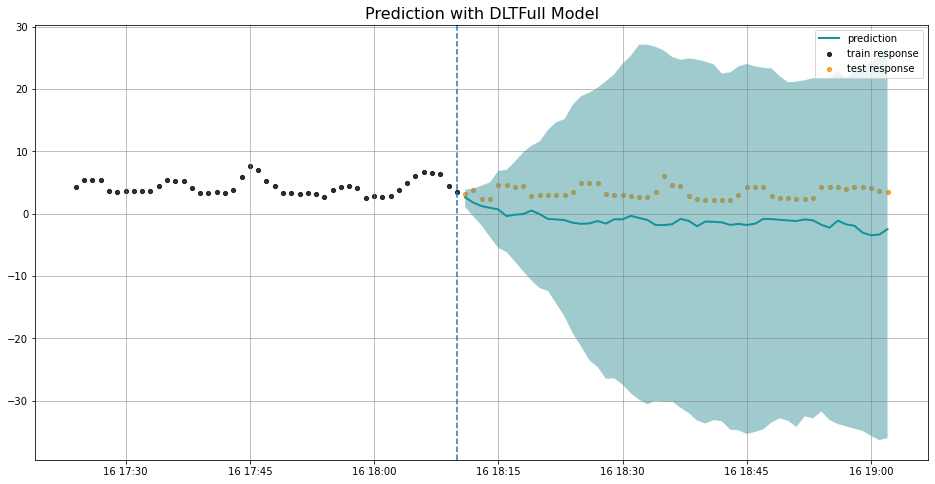

In [4]:
#define the DLTFull model
dlt = DLTFull(
     response_col=response_col,
     date_col=date_col,
     seasonality=52,
     seed=8888
 )

#train the model
dlt.fit(df=train_df)

#make inference
predicted_df = dlt.predict(df=test_df)

#plot results
_ = plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                     date_col=dlt.date_col, actual_col=dlt.response_col, 
                     test_actual_df=test_df, title='Prediction with DLTFull Model') 

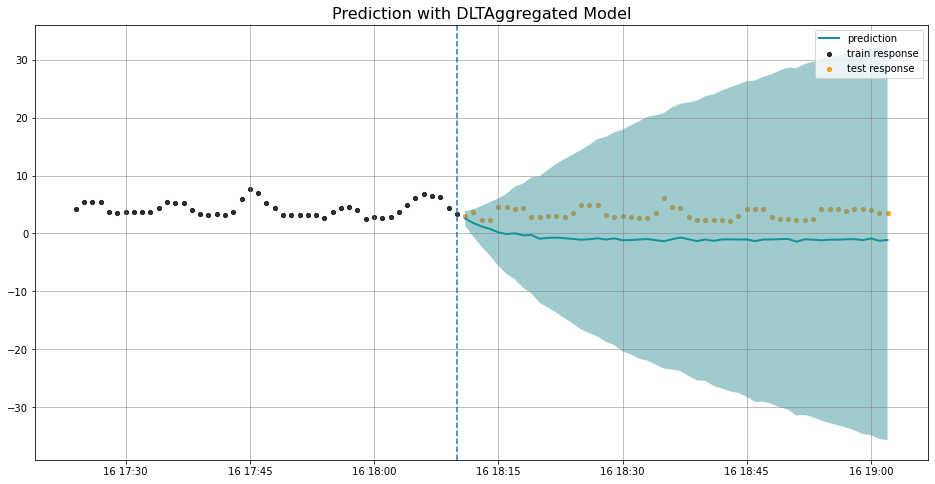

<AxesSubplot:title={'center':'Prediction with DLTAggregated Model'}>

In [5]:
#define the DLTAggregated model

# On réduit les données avant des les traiter


dlt = DLTAggregated(
     response_col=response_col,
     date_col=date_col,
     seasonality=52,
     seed=8888
 )

#train the model
dlt.fit(df=train_df)

#make inference
predicted_df = dlt.predict(df=test_df)

#plot results
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                     date_col=dlt.date_col, actual_col=dlt.response_col, 
                     test_actual_df=test_df, title='Prediction with DLTAggregated Model')